# Case Study 1 Questions
**What is the difference in weight between babies born to mothers who smoked
during pregnancy and those who did not? Is this difference important to the
health of the baby?**
1. Summarize numerically the two distributions of birth weight for babies born to
women who smoked during their pregnancy and for babies born to women who
did not smoke during their pregnancy.

2. Use graphical methods to compare the two distributions of birth weight.

3. Compare the frequency, or incidence, of low-birth-weight babies for the two
groups. How reliable do you think your estimates are? That is, how would the
incidence of low birth weight change if a few more or fewer babies were
classified as low birth weight?

4. Asses the importance of the difference you found in your three types of
comparisons (numerical, graphical, incidence). Summarize your findings and
relate them to other studies.

5. Form own question for last part.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
from scipy.stats import ttest_ind
from scipy.stats.mstats import mquantiles
from scipy.stats import kurtosis
from scipy.stats import probplot

In [4]:
# Set upt plot style
plt.style.use(['fivethirtyeight'])

## Load datasets

In [5]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [6]:
# Load in the data sets
df1 = pd.read_csv('babies.txt', delim_whitespace=True)
df2 = pd.read_csv('babies23.txt', delim_whitespace=True)

In [7]:
df1 = df1[df1.weight != 999]

### Exploring 'babies.txt'

**bwt** - birth weight in ounces (999 unknown)

**gestation** - gestation days

**parity** - 0 means first born

**age** - mom age in years

**height** - mom height in inches

**weight** - mom pre-pregnancy weight in pounds

**smoke** - mom smoke, 0 means no, 1 means yes, 9 means unknown

In [8]:
df1.head()

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,123,999,0,36,69,190,0
4,108,282,0,23,67,125,1


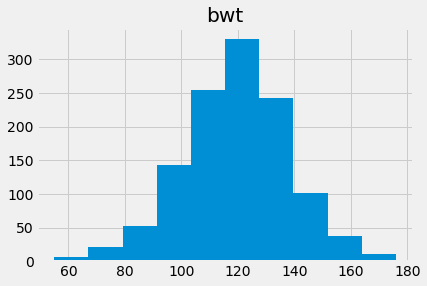

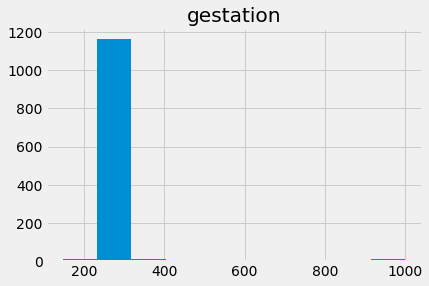

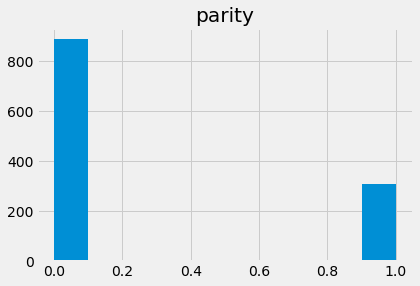

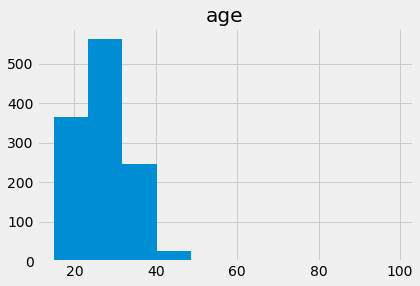

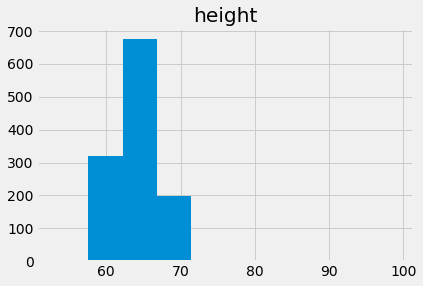

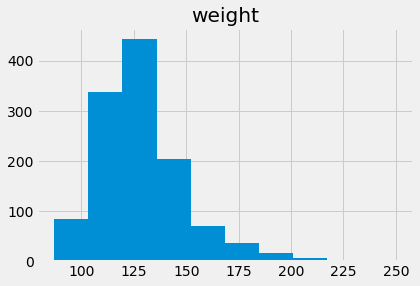

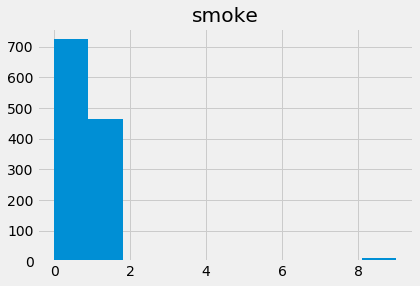

In [9]:
for c in df1.columns:
    df1.hist(column=c)[0]
    plt.show()

### Exploring 'babies23.txt'

**id** - id number

**pluralty** - 5 means single fetus

**outcome** - 1 for live birth that survived at least 28 days

**date** - birth date 1096=January 1, 1961 (this might be a timestamp, not very sure)

**gestation** - gestation days

**sex** - infant sex, 1=male, 2=female, 9=unknown

**wt** - birth weight in ounces

**parity** - 0 means first born

**race** - mom race, 0-5=white, 6=mex, 7=black, 8=asian, 9=mix, 99=unknown

**age** - mom age in years

**ed** - mom education, 0=(<8), 1=(8-<12), 2=12, 3=12+trade, 4=12+some college, 5=16, 7=trade (hs unclear), 9=unknown

**ht** - mom height in inches

**wt** - mom pre-pregnancy weight in pounds (notice that this column name will be renamed to wt.1, since there are two duplicate wt column names)

**drace** - dad race

**dage** - dad age

**ded** - dad education

**dht** - dad height

**dwt** - dad weight

**marital** - 1=married, 2-4=sep, div, wid, 5=never married, blank

**inc** - total income in 2500 increments, 0=under 2500, 1=2500-4999, ..., 9=22500+, 98=unknown, 99=not asked

**smoke** - mom smoke, 0=never, 1=yes now, 2=until pregnancy, 3=once did not now, 9=unknown

**time** - how long ago quit, 0=never, 1=still, 2=during preg, 3=up to 1 yr, 4=up to 2 yr, 5=up to 3 yr, 6=up to 4 yr, 7=5 to 9 yr, 8=10+ yr, 9=quit and don't know, 98=unknown

**number** - number of cigs smoke a day for past and current smokers, 0=never, 1=1-4, 2=5-9, 3=10-14, 4=15-19, 5=20-29, 6=30-39, 7=40-60, 8=60+, 9=smoke but don't know, 98=unknown



In [10]:
df2.head()

,id,pluralty,outcome,date,gestation,sex,wt,parity,race,age,...,drace,dage,ded,dht,dwt,marital,inc,smoke,time,number
0,15,5,1,1411,284,1,120,1,8,27,...,8,31,5,65,110,1,1,0,0,0
1,20,5,1,1499,282,1,113,2,0,33,...,0,38,5,70,148,1,4,0,0,0
2,58,5,1,1576,279,1,128,1,0,28,...,5,32,1,99,999,1,2,1,1,1
3,61,5,1,1504,999,1,123,2,0,36,...,3,43,4,68,197,1,8,3,5,5
4,72,5,1,1425,282,1,108,1,0,23,...,0,24,5,99,999,1,1,1,1,5


/Users/nicholasroberts/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=5.0, right=5.0
  'left=%s, right=%s') % (left, right))
/Users/nicholasroberts/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/Users/nicholasroberts/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=5.0, top=5.0
  'bottom=%s, top=%s') % (bottom, top))
/Users/nicholasroberts/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expandi

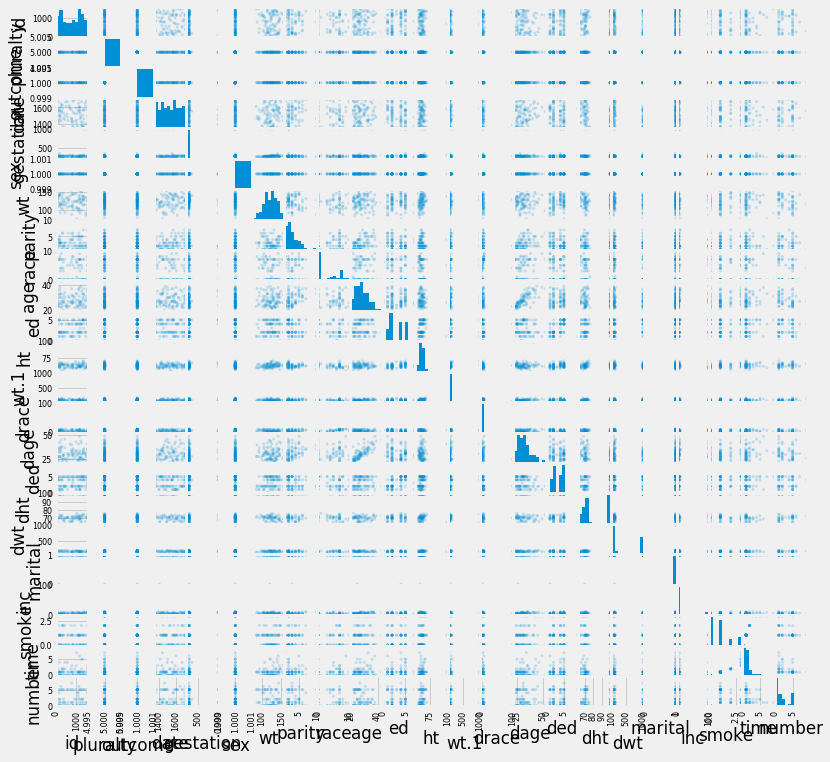

In [11]:
pd.plotting.scatter_matrix(df2[:100], alpha=0.2, figsize=(12, 12))

plt.show()

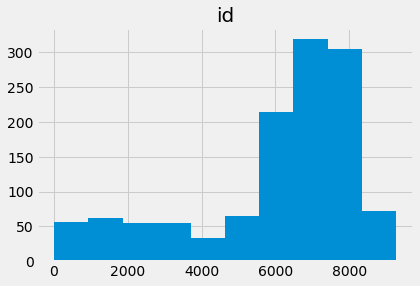

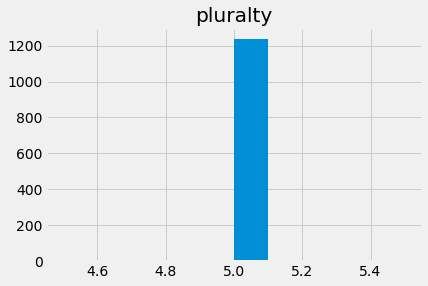

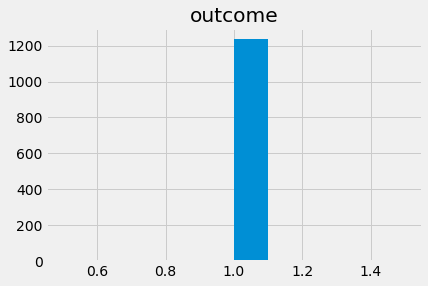

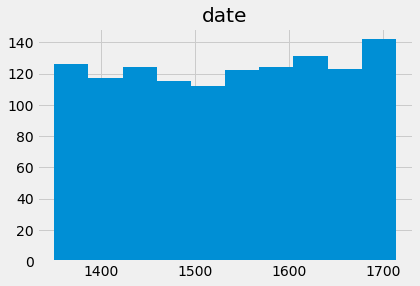

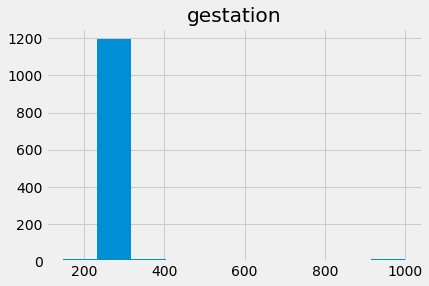

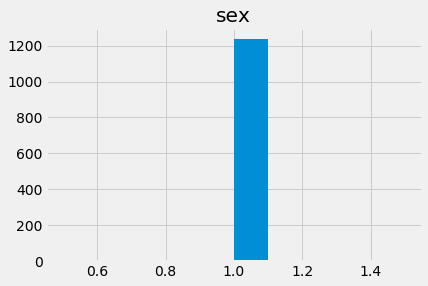

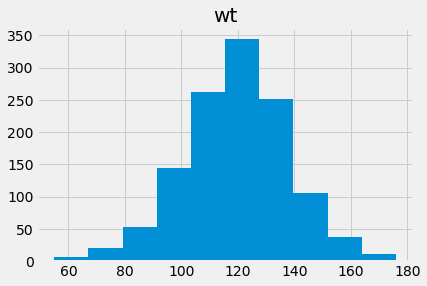

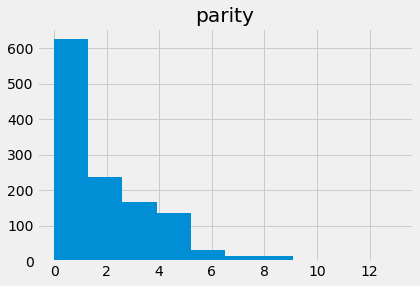

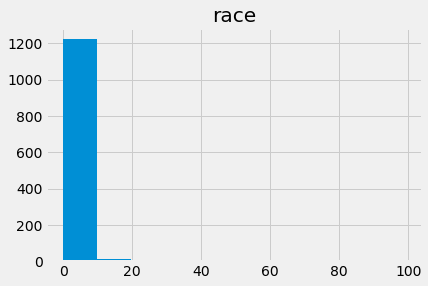

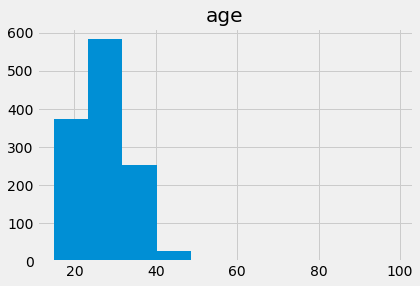

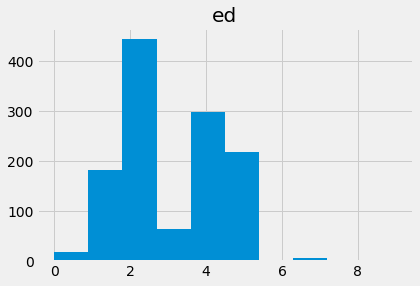

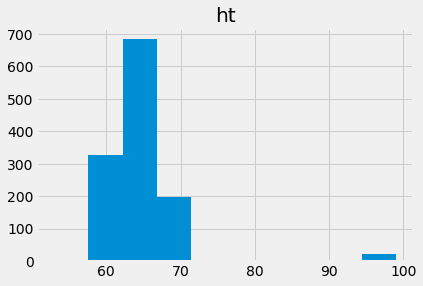

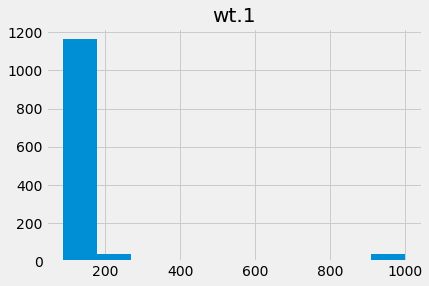

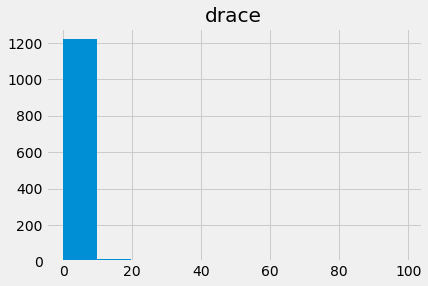

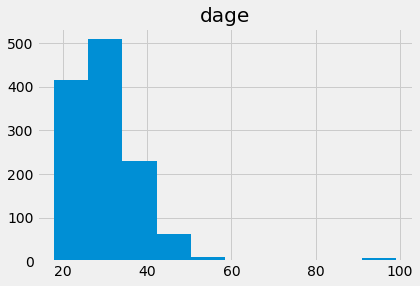

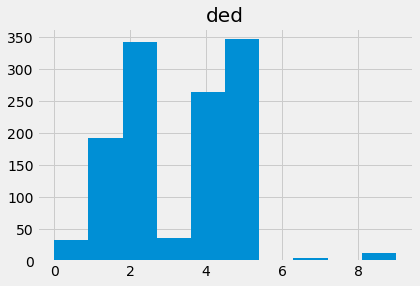

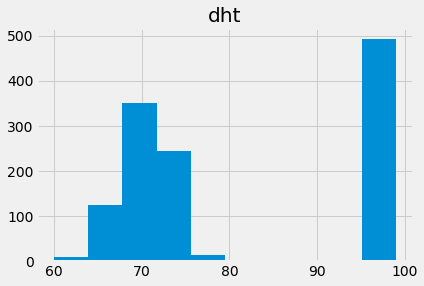

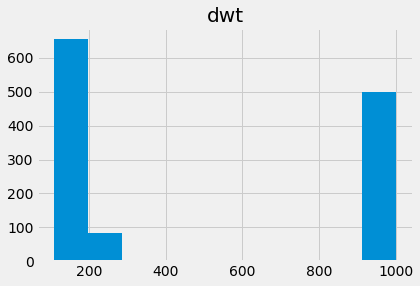

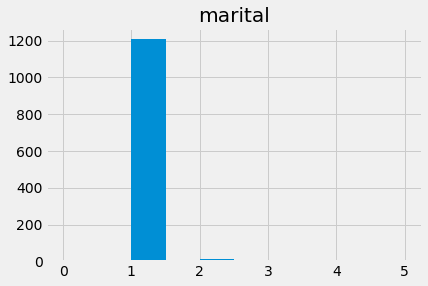

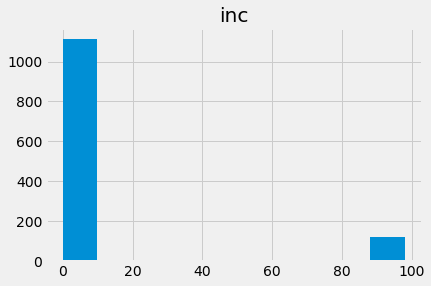

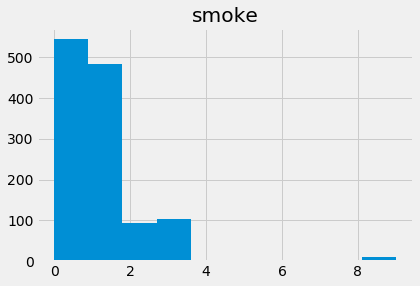

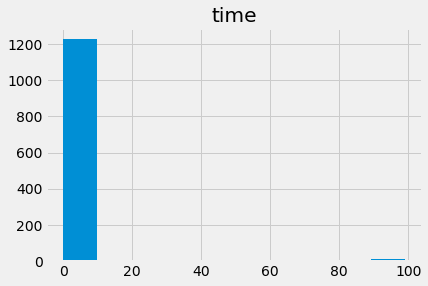

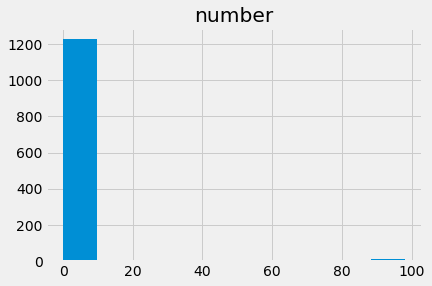

In [12]:
for c in df2.columns:
    df2.hist(column=c)[0]
    plt.show()

# Question 1
Summarize numerically the two distributions of birth weight for babies born to women who smoked during their pregnancy and for babies born to women who did not smoke during their pregnancy.

What we'll use:
1. Min/max bwt of smoke/nonsmoke
2. mean bwt of smoke/nonesmoke
3. median bwt of smoke/nonsmoke
4. quartiles

_*Note here we will __ONLY__ be using 'babies.txt'_

In [11]:
df1 = pd.read_csv('babies.txt', delim_whitespace=True)

# Partition data to smoke babies and no smoke babies
smoke_mask = (df1['smoke'] == 1)
no_smoke_mask = (df1['smoke'] == 0)

smoke_df = df1.loc[smoke_mask]
no_smoke_df = df1.loc[no_smoke_mask]

In [12]:
smoke_df = smoke_df[smoke_df.bwt != 999]
no_smoke_df = no_smoke_df[no_smoke_df.bwt != 999]

In [13]:
# Calculate min, max, mean, and median of smoking bwt
min_smoke_bwt = min(smoke_df['bwt'])
max_smoke_bwt = max(smoke_df['bwt'])
mean_smoke_bwt = np.mean(smoke_df['bwt'])
med_smoke_bwt = np.median(smoke_df['bwt'])

# Calculate min, max, mean, and median of non-smoking bwt
min_no_smoke_bwt = min(no_smoke_df['bwt'])
max_no_smoke_bwt = max(no_smoke_df['bwt'])
mean_no_smoke_bwt = np.mean(no_smoke_df['bwt'])
med_no_smoke_bwt = np.median(no_smoke_df['bwt']) 

print('Birth Weight\n')
print('\tsmoke\tno smoke')
print('min\t%d\t%d' % (min_smoke_bwt,min_no_smoke_bwt))
print('max\t%d\t%d' % (max_smoke_bwt,max_no_smoke_bwt))
print('mean\t%d\t%d' % (mean_smoke_bwt,mean_no_smoke_bwt))
print('med\t%d\t%d' % (med_smoke_bwt, med_no_smoke_bwt))

Birth Weight

	smoke	no smoke
min	58	55
max	163	176
mean	114	123
med	115	123


In [14]:
# Quantiles
print("smoking weight quantiles")
print(mquantiles(smoke_df['bwt']))
print()
print("non smoking weight quantiles")
print(mquantiles(no_smoke_df['bwt']))

smoking weight quantiles
[102. 115. 126.]

non smoking weight quantiles
[113. 123. 134.]


# Question 2
Use graphical methods to compare the two distributions of birth weight.

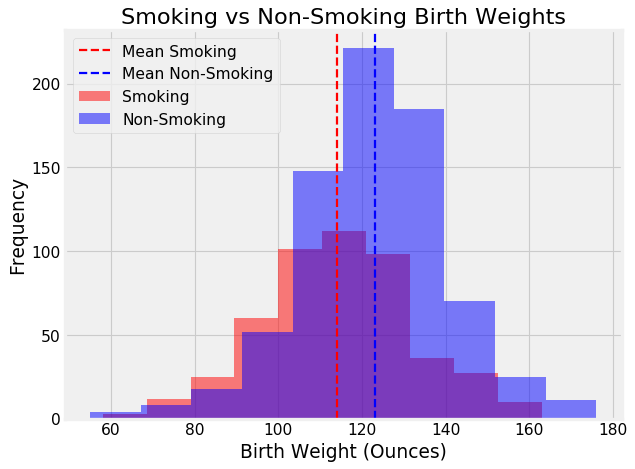

In [21]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# Histograms of smoking/nonsmoking birth weights
plt.hist(smoke_df['bwt'], label='Smoking', color='red', alpha=0.5)
plt.hist(no_smoke_df['bwt'], label='Non-Smoking', color='blue', alpha=0.5)


# Lines for mean of birth weights
line_kwargs = {'linewidth' : 2, 'linestyle' :'dashed'}
plt.axvline(**line_kwargs, x=np.mean(smoke_df['bwt']), color='red', label='Mean Smoking')
plt.axvline(**line_kwargs, x=np.mean(no_smoke_df['bwt']), color='blue', label='Mean Non-Smoking')

# Plot text
plt.legend()
plt.title('Smoking vs Non-Smoking Birth Weights')
plt.xlabel('Birth Weight (Ounces)')
plt.ylabel('Frequency')

# display plot
# plt.savefig('temp.png', dpi=1200)
plt.show()

/Users/nicholasroberts/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


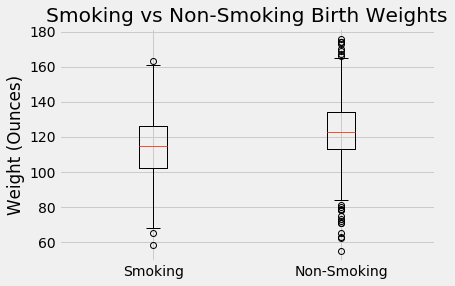

In [22]:
plt.boxplot([smoke_df['bwt'], no_smoke_df['bwt']], labels=['Smoking','Non-Smoking'])
plt.ylabel('Weight (Ounces)')
plt.title('Smoking vs Non-Smoking Birth Weights')
plt.show()

# Question 3
Compare the frequency, or incidence, of low-birth-weight babies for the two
groups. How reliable do you think your estimates are? That is, how would the
incidence of low birth weight change if a few more or fewer babies were
classified as low birth weight?

## OMEGALUL

In [14]:
text = '../test.txt'
a = pd.read_csv(text, sep=r"\s*", header=None)

/Users/nicholasroberts/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


FileNotFoundError: [Errno 2] No such file or directory: '../test.txt'

In [15]:
a.head()

NameError: name 'a' is not defined

In [186]:
df2.keys()

avg = np.mean(df2['wt'])

In [187]:
dfcollege = df2[(df2['ed'] == 4) | (df2['ed'] == 5)]
dfnohigh = df2[(df2['ed'] == 0) | (df2['ed'] == 1)]
dfhigh = df2[(df2['ed'] == 2) | (df2['ed'] == 3)]

In [188]:
# mom race, 0-5=white, 6=mex, 7=black, 8=asian, 9=mix, 99=unknown
# mom education, 0=(<8), 1=(8-<12), 2=12, 3=12+trade, 4=12+some college, 5=16, 7=trade (hs unclear), 9=unknown

In [189]:
locollege = len(df2[(df2['wt'] < avg) & ((df2['ed'] == 4) | (df2['ed'] == 5))])
lonohigh = len(df2[(df2['wt'] < avg) & ((df2['ed'] == 0) | (df2['ed'] == 1))])
lohigh = len(df2[(df2['wt'] < avg) & ((df2['ed'] == 2) | (df2['ed'] == 3))])

hicollege = len(df2[(df2['wt'] >= avg) & ((df2['ed'] == 2) | (df2['ed'] == 3))])
hinohigh = len(df2[(df2['wt'] >= avg) & ((df2['ed'] == 0) | (df2['ed'] == 1))])
hihigh = len(df2[(df2['wt'] >= avg) & ((df2['ed'] == 2) | (df2['ed'] == 3))])

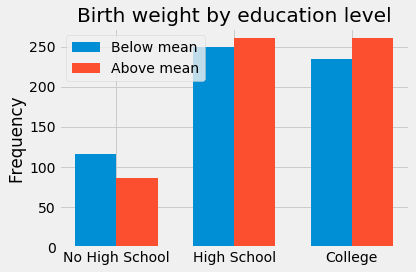

[0 1 2]
[86, 260, 260]


In [190]:
import numpy as np
import matplotlib.pyplot as plt


N = 3
menMeans = [lonohigh, lohigh, locollege]

fig, ax = plt.subplots()


ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, menMeans, width)


womenMeans = [hinohigh, hihigh, hicollege]
p2 = ax.bar(ind + width, womenMeans, width, bottom=0)

ax.set_title('Birth weight by education level')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('No High School', 'High School', 'College'))

ax.legend((p1[0], p2[0]), ('Below mean', 'Above mean'))
ax.autoscale_view()

plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('bwt_edu_means.png', dpi=420, )

plt.show()

print(ind)
print(womenMeans)

In [191]:
lobwt = 88.1849

locollege = len(df2[(df2['wt'] < lobwt) & ((df2['ed'] == 4) | (df2['ed'] == 5))])
lonohigh = len(df2[(df2['wt'] < lobwt) & ((df2['ed'] == 0) | (df2['ed'] == 1))])
lohigh = len(df2[(df2['wt'] < lobwt) & ((df2['ed'] == 2) | (df2['ed'] == 3))])

hicollege = len(df2[(df2['wt'] >= lobwt) & ((df2['ed'] == 2) | (df2['ed'] == 3))])
hinohigh = len(df2[(df2['wt'] >= lobwt) & ((df2['ed'] == 0) | (df2['ed'] == 1))])
hihigh = len(df2[(df2['wt'] >= lobwt) & ((df2['ed'] == 2) | (df2['ed'] == 3))])

nohigh_pct = (lonohigh / (lonohigh + hinohigh)) * 100
high_pct = (lohigh / (lohigh + hihigh)) * 100
college_pct = (locollege / (locollege + hicollege)) * 100

print('No high school LBW%: {}%'.format(nohigh_pct))
print('High school LBW%: {}%'.format(high_pct))
print('College LBW%: {}%'.format(college_pct))

No high school LBW%: 9.405940594059405%
High school LBW%: 4.12573673870334%
College LBW%: 4.500978473581213%


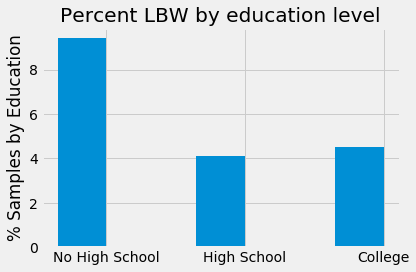

[0 1 2]
[86, 260, 260]


In [201]:
import numpy as np
import matplotlib.pyplot as plt


N = 3
menMeans = [nohigh_pct, high_pct, college_pct]

fig, ax = plt.subplots()


ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, menMeans, width)

ax.set_title('Percent LBW by education level')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('No High School', 'High School', 'College'))

ax.autoscale_view()

plt.ylabel('% Samples by Education')
plt.tight_layout()
plt.savefig('lbw_edu_percent.png', dpi=420, )

plt.show()

print(ind)
print(womenMeans)